# 21DS602 (21-22(Odd))  TERM PROJECT 

## Submitted by : CB.EN.P2DSC21009 - DHARSHINI V J & CB.EN.P2DSC21032 - YAZHINI V
## Submitted on : 31-01-2022


## Aerial Image Classification Using ML Algorithms 

### Importing Libraries 

In [67]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
import numpy as np 
import pandas as pd

### Importing Tree class and applying SVD

Working with 105 images
Image examples: 
500_15.jpg


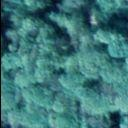

500_16.jpg


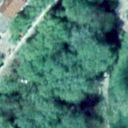

500_17.jpg


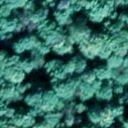

500_18.jpg


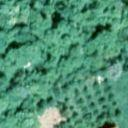

500_19.jpg


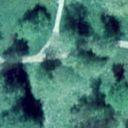

500_2.jpg


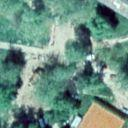

500_20.jpg


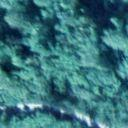

500_21.jpg


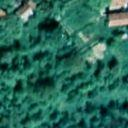

In [68]:
folder = r"E:\Yazhini\Dataset\Aerial\tree"
encoded = folder.encode("UTF-8")
folder = encoded.decode("UTF-8")
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(12, 20):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=128, height=128))


Files in train_files: 105
All images to array!


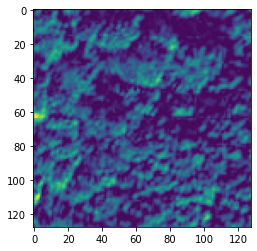

In [69]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt
train_files = []
y_train1 = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train1.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))
# Original Dimensions
image_width = 128
image_height = 128
ratio = 1

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)



dataset = np.ndarray(shape=(len(train_files), image_height, image_width),
                     dtype=np.float32)


i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    #img.thumbnail((image_width, image_height))

    
    data =img.getdata()
    # convert to numpy array 
    img_mat = np.array(list(data), float) 
    #print(img_mat.size)
    # get image shape
    img_mat.shape = (img.size[1], img.size[0])
    # conver to 1d-array to matrix
    img_mat = np.matrix(img_mat)
    #print(img_mat)

    img_mat= (img_mat-img_mat.mean())/img_mat.std()
    U, s, V = np.linalg.svd(img_mat)   
    num_components = 70
    img_mat = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(V[:num_components, :])    
    plt.imshow(img_mat)   
    dataset[i] = img_mat
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")


### Train and Test Split for Tree class 

In [70]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(dataset, y_train1, test_size=0.2, random_state=33)
nsamples, nx, ny = X1_train.shape
X1_train = X1_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X1_test.shape
X1_test = X1_test.reshape((nsamples,nx*ny))
print(X1_train.shape)
print(len(y1_train))

(84, 16384)
84


### Importing Field class and applying SVD 

Working with 178 images
Image examples: 
200_109.jpg


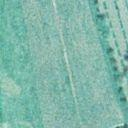

200_11.jpg


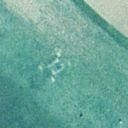

200_110.jpg


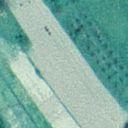

200_111.jpg


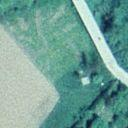

200_112.jpg


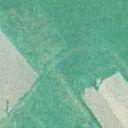

200_113.jpg


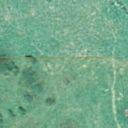

200_114.jpg


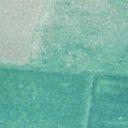

200_115.jpg


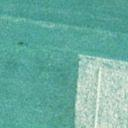

In [71]:
folder = r"E:\Yazhini\Dataset\Aerial\field"
encoded = folder.encode("UTF-8")
folder = encoded.decode("UTF-8")
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(12, 20):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=128, height=128))


Files in train_files: 178
All images to array!


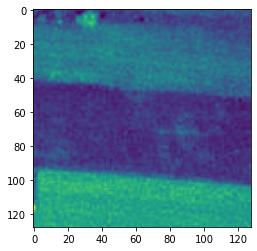

In [72]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt
train_files = []
y_train2 = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train2.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))
# Original Dimensions
image_width = 128
image_height = 128
ratio = 1

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)


dataset = np.ndarray(shape=(len(train_files), image_height, image_width),
                     dtype=np.float32)


i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
     
    data =img.getdata()
    # convert to numpy array 
    img_mat = np.array(list(data), float) 
    #print(img_mat.size)
    # get image shape
    img_mat.shape = (img.size[1], img.size[0])
    # conver to 1d-array to matrix
    img_mat = np.matrix(img_mat)
    #print(img_mat)
   
    img_mat= (img_mat-img_mat.mean())/img_mat.std()
    U, s, V = np.linalg.svd(img_mat)   
    num_components = 70
    img_mat = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(V[:num_components, :])    
    plt.imshow(img_mat)    
    
    dataset[i] = img_mat
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

### Train and Test Split for Field class 

In [73]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(dataset, y_train2, test_size=0.2, random_state=33)
nsamples, nx, ny = X2_train.shape
X2_train = X2_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X2_test.shape
X2_test = X2_test.reshape((nsamples,nx*ny))
print(X2_train.shape)
print(len(y2_train))

(142, 16384)
142


### Importing House class and applying SVD

Working with 143 images
Image examples: 
300_109.jpg


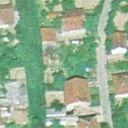

300_11.jpg


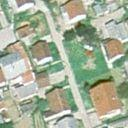

300_110.jpg


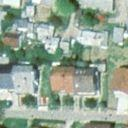

300_111.jpg


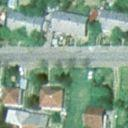

300_112.jpg


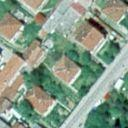

300_113.jpg


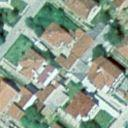

300_114.jpg


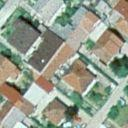

300_115.jpg


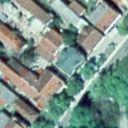

In [74]:
folder = r"E:\Yazhini\Dataset\Aerial\house"
encoded = folder.encode("UTF-8")
folder = encoded.decode("UTF-8")
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(12, 20):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=128, height=128))


Files in train_files: 143
All images to array!


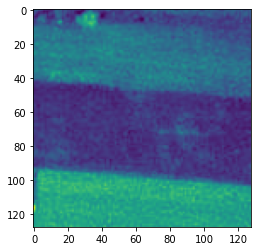

In [75]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt
train_files = []
y_train3 = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train3.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))
# Original Dimensions
image_width = 128
image_height = 128
ratio = 1

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)



dataset = np.ndarray(shape=(len(train_files), image_height, image_width),
                     dtype=np.float32)


i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
     
    data =img.getdata()
    # convert to numpy array 
    img_mat = np.array(list(data), float) 
    #print(img_mat.size)
    # get image shape
    img_mat.shape = (img.size[1], img.size[0])
    # conver to 1d-array to matrix
    img_mat = np.matrix(img_mat)
    #print(img_mat)
    num_components = 128
    img_mat = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(V[:num_components, :])    
    plt.imshow(img_mat) 
    
    
    dataset[i] = img_mat
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

### Train and Test Split for House class 

In [76]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(dataset, y_train3, test_size=0.2, random_state=33)
nsamples, nx, ny = X3_train.shape
X3_train = X3_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X3_test.shape
X3_test = X3_test.reshape((nsamples,nx*ny))
print(X3_train.shape)
print(len(y3_train))


(114, 16384)
114


### Concatenating all the train and test

In [77]:
y11_train=np.concatenate((y1_train, y2_train, y3_train))
y11_test=np.concatenate((y1_test, y2_test, y3_test))
X11_train=np.vstack((X1_train, X2_train, X3_train))
X11_test=np.vstack((X1_test, X2_test, X3_test))
print(X11_train.shape)
print(y11_train.shape)
print(X11_test.shape)
print(y11_test.shape)

(340, 16384)
(340,)
(86, 16384)
(86,)


### Applying KNN 

<AxesSubplot:>

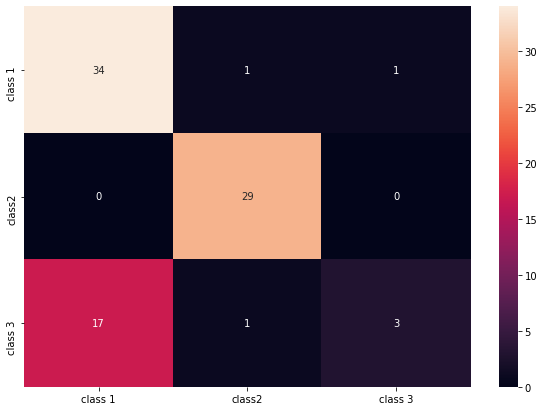

In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
knn = KNN(n_neighbors = 3)
knn.fit(X11_train, y11_train)
Y1_pred = knn.predict(X11_test)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y11_test, Y1_pred)
df_cm = pd.DataFrame(cf_matrix, index = [ 'class 1', 'class2', 'class 3'],
                  columns = [ 'class 1', 'class2', 'class 3'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)


In [79]:
from sklearn import metrics
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y11_test, Y1_pred, target_names=target_names, digits=4))
accuracy1 = metrics.accuracy_score(y11_test, Y1_pred) 
print("Accuracy score:",accuracy1)

              precision    recall  f1-score   support

     class 1     0.6667    0.9444    0.7816        36
     class 2     0.9355    1.0000    0.9667        29
     class 3     0.7500    0.1429    0.2400        21

    accuracy                         0.7674        86
   macro avg     0.7841    0.6958    0.6628        86
weighted avg     0.7777    0.7674    0.7118        86

Accuracy score: 0.7674418604651163


### Applying Decision Tree 

<AxesSubplot:>

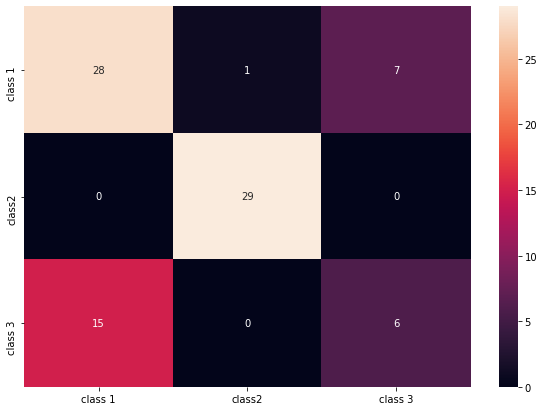

In [80]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state=0)
classifier.fit(X11_train, y11_train)
Y2_pred = classifier.predict(X11_test)
cm = metrics.confusion_matrix(y11_test, Y2_pred) 
df_cm = pd.DataFrame(cm, index = [ 'class 1', 'class2', 'class 3'],
                  columns = [ 'class 1', 'class2', 'class 3'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)


In [81]:
print(classification_report(y11_test, Y2_pred, target_names=target_names, digits=4))
accuracy2 = metrics.accuracy_score(y11_test, Y2_pred) 
print("Accuracy score:",accuracy2)

              precision    recall  f1-score   support

     class 1     0.6512    0.7778    0.7089        36
     class 2     0.9667    1.0000    0.9831        29
     class 3     0.4615    0.2857    0.3529        21

    accuracy                         0.7326        86
   macro avg     0.6931    0.6878    0.6816        86
weighted avg     0.7113    0.7326    0.7144        86

Accuracy score: 0.7325581395348837


### Applying Logistic Regression 

<AxesSubplot:>

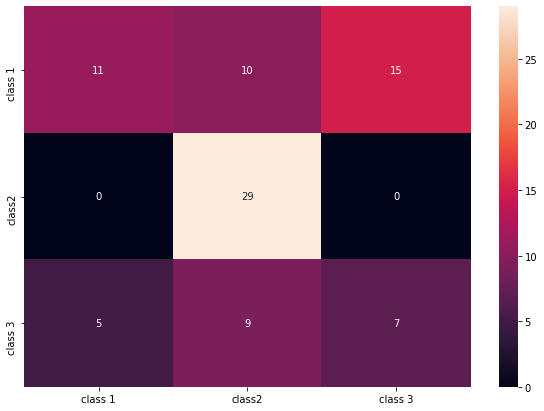

In [82]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver="liblinear")
classifier.fit(X11_train, y11_train)
Y3_pred = classifier.predict(X11_test)
cm1 = metrics.confusion_matrix(y11_test, Y3_pred) 
df_cm = pd.DataFrame(cm1, index = [ 'class 1', 'class2', 'class 3'],
                  columns = [ 'class 1', 'class2', 'class 3'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)


In [83]:
print(classification_report(y11_test, Y3_pred, target_names=target_names, digits=4))
accuracy3 = metrics.accuracy_score(y11_test, Y3_pred) 
print("Accuracy score:",accuracy3)

              precision    recall  f1-score   support

     class 1     0.6875    0.3056    0.4231        36
     class 2     0.6042    1.0000    0.7532        29
     class 3     0.3182    0.3333    0.3256        21

    accuracy                         0.5465        86
   macro avg     0.5366    0.5463    0.5006        86
weighted avg     0.5692    0.5465    0.5106        86

Accuracy score: 0.5465116279069767


### Finding best parameters for our model 

In [84]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},{'kernel': ['poly'], 'C': [1, 10, 100, 1000],'degree': [1, 10]}]
                    
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X11_train, y11_train)
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
print('Best degree:',svm_model.best_estimator_.degree,"\n")



Best C: 10 

Best Gamma: 0.0001 

Best degree: 3 



### Applying SVM - Linear Kernel

<AxesSubplot:>

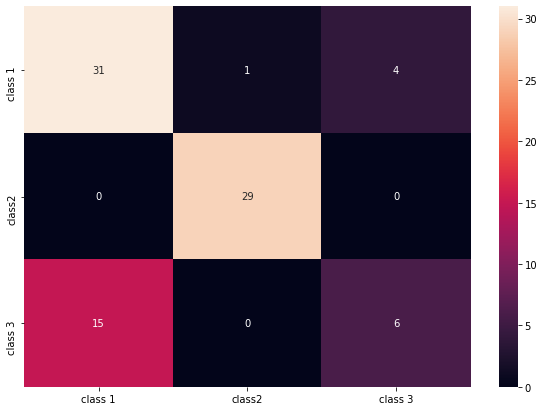

In [85]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',C=10)
classifier.fit(X11_train,y11_train)
Y4_pred = classifier.predict(X11_test)
cm2 = confusion_matrix(y11_test,Y4_pred)
df_cm = pd.DataFrame(cm2, index = [ 'class 1', 'class2', 'class 3'],
                  columns = [ 'class 1', 'class2', 'class 3'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [86]:
print(classification_report(y11_test, Y4_pred, target_names=target_names, digits=4))
accuracy4 = metrics.accuracy_score(y11_test, Y4_pred) 
print("Accuracy score:",accuracy4)

              precision    recall  f1-score   support

     class 1     0.6739    0.8611    0.7561        36
     class 2     0.9667    1.0000    0.9831        29
     class 3     0.6000    0.2857    0.3871        21

    accuracy                         0.7674        86
   macro avg     0.7469    0.7156    0.7087        86
weighted avg     0.7546    0.7674    0.7425        86

Accuracy score: 0.7674418604651163


### Applying SVM - Polynomial Kernel

<AxesSubplot:>

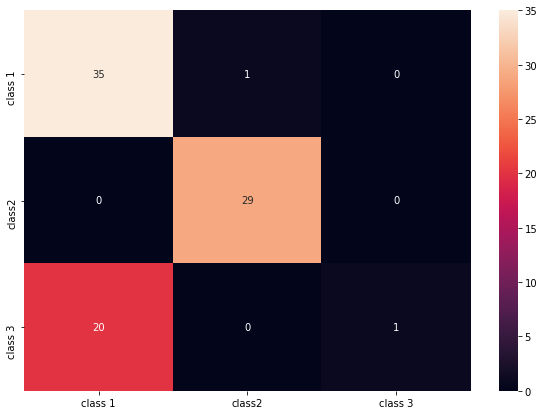

In [87]:
from sklearn.svm import SVC
classifier = SVC( kernel="poly",degree=3,C=10)
classifier.fit(X11_train, y11_train)
Y5_pred = classifier.predict(X11_test)
cm = metrics.confusion_matrix(y11_test, Y5_pred) 
df_cm = pd.DataFrame(cm, index = [ 'class 1', 'class2', 'class 3'],
                  columns = [ 'class 1', 'class2', 'class 3'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [88]:
print(classification_report(y11_test, Y5_pred, target_names=target_names, digits=4))
accuracy5 = metrics.accuracy_score(y11_test, Y5_pred) 
print("Accuracy score:",accuracy5)

              precision    recall  f1-score   support

     class 1     0.6364    0.9722    0.7692        36
     class 2     0.9667    1.0000    0.9831        29
     class 3     1.0000    0.0476    0.0909        21

    accuracy                         0.7558        86
   macro avg     0.8677    0.6733    0.6144        86
weighted avg     0.8365    0.7558    0.6757        86

Accuracy score: 0.7558139534883721


### Applying SVM - RBF Kernel 

<AxesSubplot:>

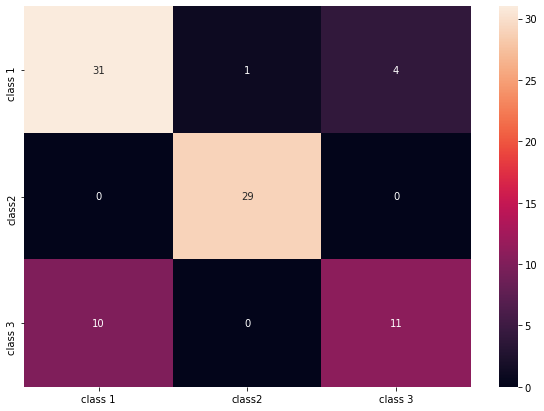

In [89]:
from sklearn.svm import SVC
classifier = SVC( kernel="rbf",gamma=0.0001,C=10)
classifier.fit(X11_train, y11_train)
Y6_pred = classifier.predict(X11_test)
cm = metrics.confusion_matrix(y11_test, Y6_pred) 
df_cm = pd.DataFrame(cm, index = [ 'class 1', 'class2', 'class 3'],
                  columns = [ 'class 1', 'class2', 'class 3'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)


In [90]:
print(classification_report(y11_test, Y6_pred, target_names=target_names, digits=4))
accuracy6 = metrics.accuracy_score(y11_test, Y6_pred) 
print("Accuracy score:",accuracy6)

              precision    recall  f1-score   support

     class 1     0.7561    0.8611    0.8052        36
     class 2     0.9667    1.0000    0.9831        29
     class 3     0.7333    0.5238    0.6111        21

    accuracy                         0.8256        86
   macro avg     0.8187    0.7950    0.7998        86
weighted avg     0.8215    0.8256    0.8178        86

Accuracy score: 0.8255813953488372
